In [173]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels as stat
import seaborn as sns
import keras
from sklearn.metrics import mean_squared_error

,tair
datetime,
2021-10-01,32.9
2021-10-02,31.0
2021-10-03,26.7
2021-10-04,27.7
2021-10-05,29.2
...,...
2023-11-04,29.3
2023-11-05,29.0
2023-11-06,28.0


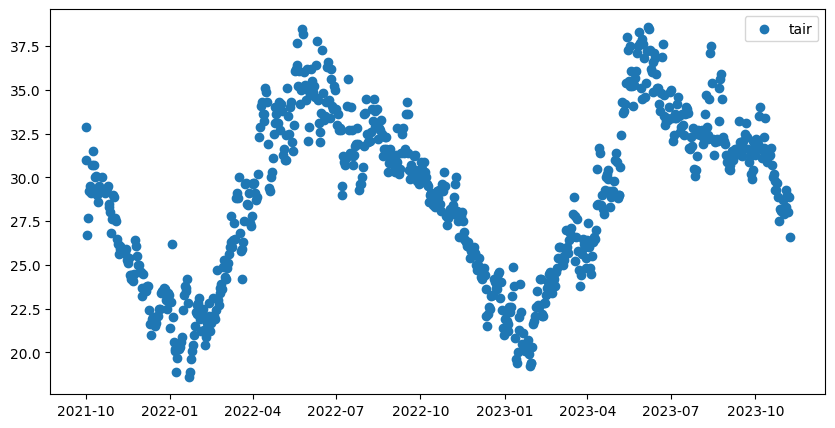

In [169]:
# read air temperature data and plot
t =  pd.read_excel('/content/tair.xlsx')
plt.figure(figsize=(10,5))
plt.scatter(t["datetime"],t["tair"])
plt.legend(["tair"])

# set time data as index
t[t.columns[0]]=pd.to_datetime(t[t.columns[0]]).dt.date
t.set_index(t.columns[0],inplace=True)
display(t)

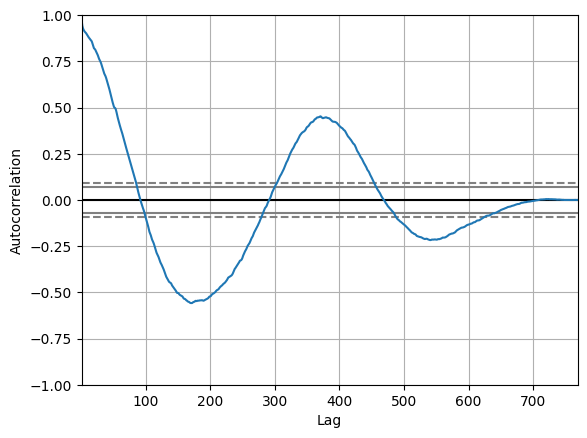

In [113]:
# autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(t["tair"])
plt.show()

#Ensemble simulation:
In certain applications, such as uncertainty quantification, it's necessary to generate ensembles for time series data while accurately modeling their temporal correlation (i.e., colored noise). This example demonstrates how to generate an ensemble for air temperature (tair) using an autoregressive (AR) model.

The process involves decomposing the time series into three components: trend, seasonality, and residuals. The residuals are then modeled with an AR model to capture the temporal correlation. Once the residuals are simulated, they are added back to the trend and seasonality components to form the ensembles.

False

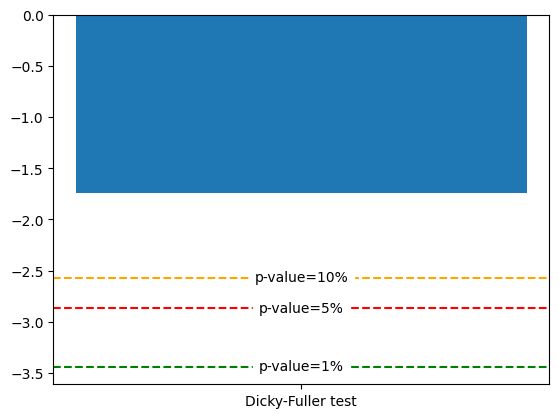

In [114]:
def check_stationarity(dataframe,column):
  """
    check if time series is stationary.

    Argument:
    dataframe -- a dataframe.
    column
    Returns:
    boolian -- True if time series is stationary.
  """
  results = sm.tsa.stattools.adfuller(dataframe[column])
  plt.bar("Dicky-Fuller test",results[0])
  plt.text(0,results[4]['1%'], 'p-value=1%', va='center', ha='center', backgroundcolor='w')
  plt.text(0,results[4]['5%'], 'p-value=5%', va='center', ha='center', backgroundcolor='w')
  plt.text(0,results[4]['10%'], 'p-value=10%', va='center', ha='center', backgroundcolor='w')
  plt.axhline(results[4]['1%'], color='green', linestyle='--')
  plt.axhline(results[4]['5%'], color='red', linestyle='--')
  plt.axhline(results[4]['10%'], color='orange', linestyle='--')
  return results[4]['1%'] >= results[0]
check_stationarity(t,"tair")

In [117]:
def decompose_data(dataframe,column,periodicity=None, decomposition_type='STL',Type_of_seasonal_component='additive'):
  """
    Season-Trend- Noise decomposition.

    Argument:
    dataframe -- a dataframe of type csv.
    column -- str, the name of column want to decompse.
    periodicity -- If None attempts to determine from data.
                   If Unable to determine period from endog, periodicity should be provided.
    decomposition_type -- 'STL' for decomposition using LOESS,
                          'MA' for decomposition using moving averages.
    Type_of_seasonal_component -- if decomposition_type is 'STL' Type_of_seasonal_component would be 'additive'.
                                  'additive' if  time series data is a function of the sum of its components,
                                  'multiplicative' if time series data is a function of the product of its components.

    Returns:
    decomposed_df -- pandas DataFrame of trend, seasonal and residual.
  """
  if decomposition_type=="STL":
    assert Type_of_seasonal_component=='additive', "if decomposition_type is 'STL' Type_of_seasonal_component should be 'additive'"

  if decomposition_type =='STL':
    decomposition=stat.tsa.seasonal.STL(dataframe[column],period=80,seasonal=91,seasonal_deg=0).fit()
  elif decomposition_type == 'MA':
    decomposition=stat.tsa.seasonal.seasonal_decompose(dataframe[column],model=Type_of_seasonal_component,period=periodicity)

  decomposed_df = pd.DataFrame({'Trend':decomposition.trend, 'Seasonal':decomposition.seasonal,
                                'Residual':decomposition.resid},index=dataframe.index)

  # Plot the values of the decomposed DataFrame
  pl = decomposed_df.plot(figsize=(12, 6), fontsize=15)
  plt.plot(decomposed_df.index,t[column],linewidth=0.5,label="air temperature\n at station P34")
  plt.ylabel("temperature [°C]")
  plt.legend()
  pl = decomposed_df.plot(figsize=(12, 6), fontsize=15, subplots=True)
  plt.show()
  print(decomposed_df)
  return decomposed_df

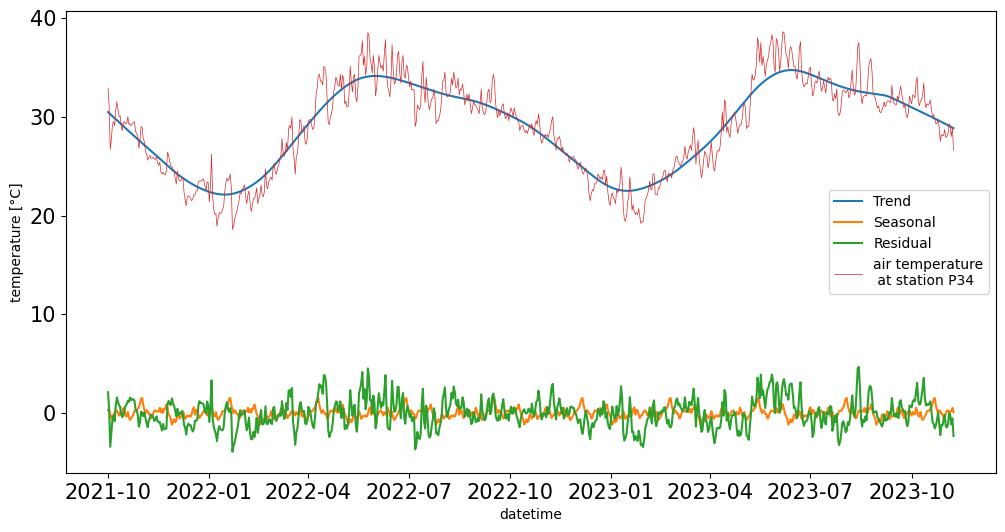

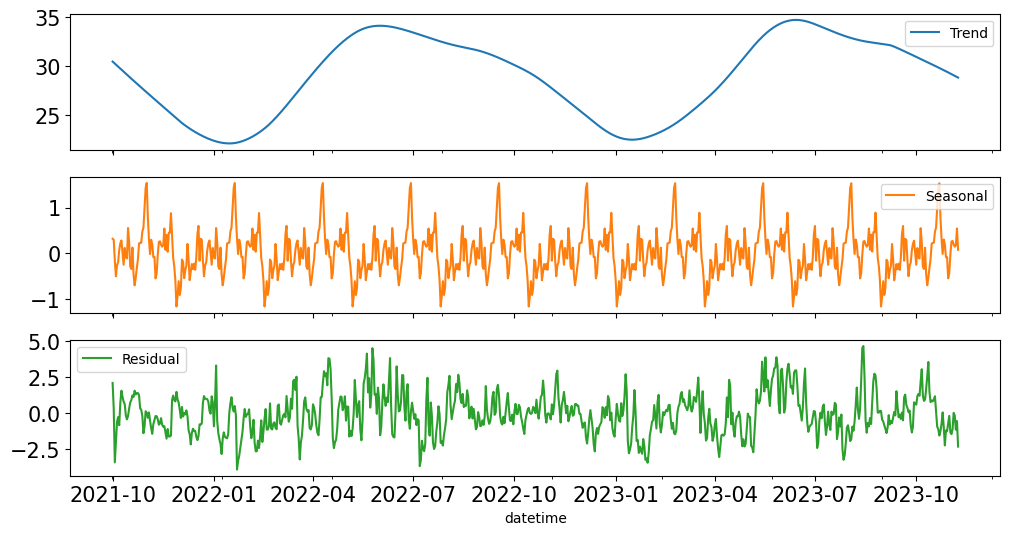

                Trend  Seasonal  Residual
datetime                                 
2021-10-01  30.469547  0.316938  2.113516
2021-10-02  30.365959  0.295259  0.338782
2021-10-03  30.262455 -0.157967 -3.404488
2021-10-04  30.159039 -0.501858 -1.957181
2021-10-05  30.055714 -0.263266 -0.592448
...               ...       ...       ...
2023-11-04  29.071608  0.191568  0.036824
2023-11-05  29.012599  0.144336 -0.156935
2023-11-06  28.953319  0.177853 -1.131172
2023-11-07  28.893770  0.542409 -0.536179
2023-11-08  28.833955  0.076082 -2.310036

[769 rows x 3 columns]


In [118]:
decomposed_temp = decompose_data(t,"tair",decomposition_type='STL')
decomposed_temp.to_csv("decomposed_tair.csv")

True

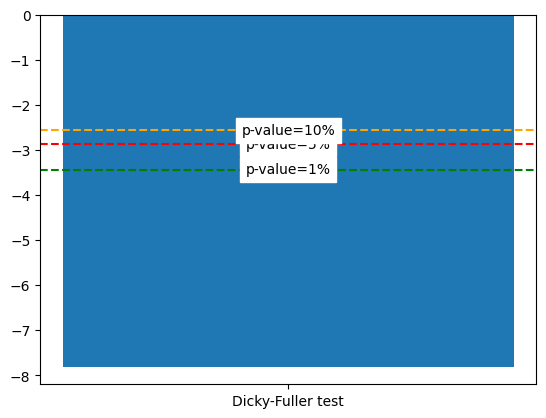

In [85]:
def check_stationarity(dataframe,column):
  """
    check if time series is stationary.

    Argument:
    dataframe -- a dataframe.
    column
    Returns:
    boolian -- True if time series is stationary.
  """
  results = sm.tsa.stattools.adfuller(dataframe[column])
  plt.bar("Dicky-Fuller test",results[0])
  plt.text(0,results[4]['1%'], 'p-value=1%', va='center', ha='center', backgroundcolor='w')
  plt.text(0,results[4]['5%'], 'p-value=5%', va='center', ha='center', backgroundcolor='w')
  plt.text(0,results[4]['10%'], 'p-value=10%', va='center', ha='center', backgroundcolor='w')
  plt.axhline(results[4]['1%'], color='green', linestyle='--')
  plt.axhline(results[4]['5%'], color='red', linestyle='--')
  plt.axhline(results[4]['10%'], color='orange', linestyle='--')
  return results[4]['1%'] >= results[0]
check_stationarity(decomposed_temp,"Residual")

In [127]:
#normality test
from scipy.stats import anderson
anderson(decomposed_temp["Residual"])

AndersonResult(statistic=1.755509225579317, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.015265808939062967, scale=1.4357636616833742)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

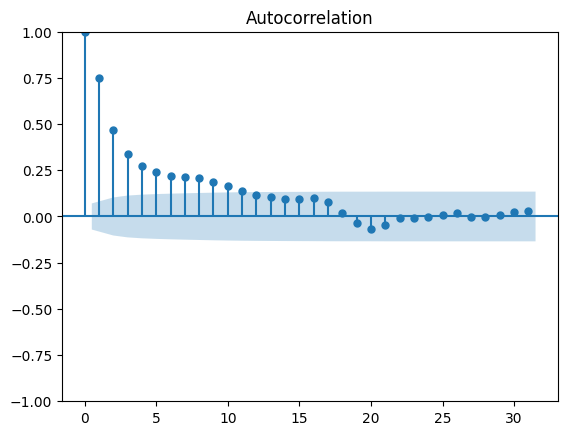

In [128]:
# model residuals with AR
# autocorrelation of residuals
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(decomposed_temp["Residual"], lags=31)
plt.show()

In [ ]:
!pip install pmdarima
import pmdarima as pm

In [89]:
#Automatically discover the optimal order for an ARIMA model.
def optimal_order_ARIMA(dataframe,column):
  """
     Discovering the optimal order of ARIMA model and show it.

    Argument:
    dataframe -- a dataframe.
    column -- str,column to be modeled.
  """
  model = pm.arima.auto_arima(dataframe[column], start_p=0, start_q=0,
                              max_order=6, test='adf', error_action='ignore',
                              suppress_warnings=True, stepwise=True, trace=True)
optimal_order_ARIMA(decomposed_temp,"Residual")

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2741.617, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2107.659, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2224.325, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2739.704, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2074.698, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2056.142, Time=0.25 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2058.105, Time=0.32 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2057.927, Time=0.50 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2057.598, Time=0.41 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=2058.765, Time=0.66 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2054.165, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2072.718, Time=0.09 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=2056.127, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2055.950, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0]          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA model is fitted on dataframeResidual
                               SARIMAX Results                                
Dep. Variable:               Residual   No. Observations:                  769
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1022.966
Date:                Sat, 05 Oct 2024   AIC                           2057.932
Time:                        06:14:46   BIC                           2085.803
Sample:                    10-01-2021   HQIC                          2068.659
                         - 11-08-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1753      0.262     -0.669      0.504      -0.689       0.338
x1             0.0004      0.001      0.621      0.535      -0.001       0.002
ar.L1    

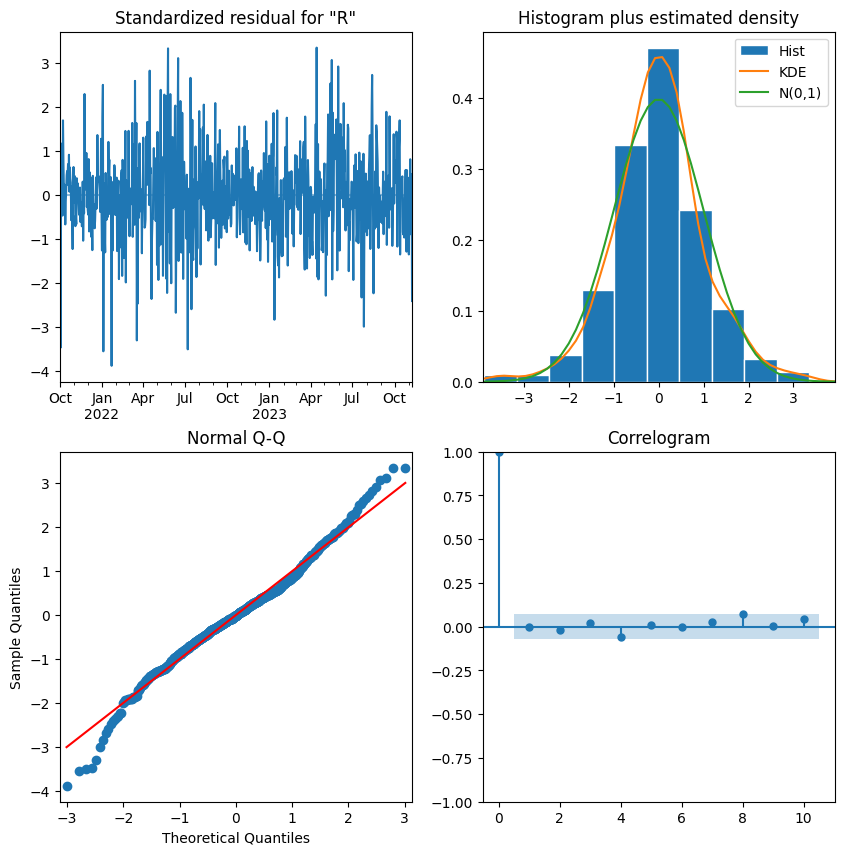

In [138]:
def ARIMA_model(dataframe, column,exogenous_column=None,Trend='ct', order=(0, 0, 0)):
  """
    fit an ARIMA model on dataframe[column]

    Argument:
    dataframe -- a dataframe.
    column -- str,column to be modeled.
    exogenous_column -- columns include exogenous variables
    order -- tuple, The (p,d,q) order of the model for the autoregressive,
            differences, and moving average components.
    Trend -- str{'c','t','ct'}, Parameter controlling the deterministic trend.
             Can be specified as a string where 'c' indicates a constant term,
             't' indicates a linear trend in time, and 'ct' includes both.

    Returns:
    model_fit -- fitted model on data
  """

  if exogenous_column != None:
    exogenous_column=dataframe[exogenous_column]
  model=stat.tsa.arima.model.ARIMA(dataframe[column], exog=exogenous_column, order=order, trend=Trend)
  model_fit=model.fit()
  print(f"ARIMA model is fitted on dataframe{column}")
  print(model_fit.summary())
  fig=model_fit.plot_diagnostics(figsize=(10,10))
  return model_fit
model=ARIMA_model(decomposed_temp,"Residual",order=(3, 0, 0))

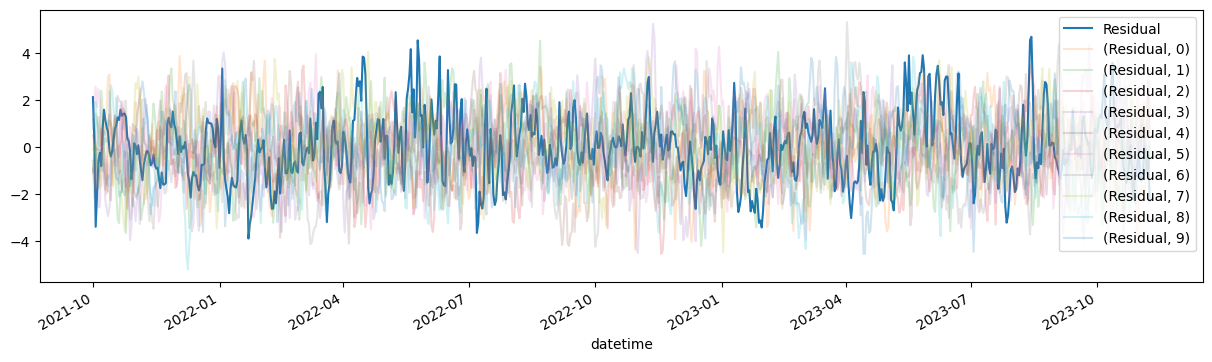

In [150]:
# ensemble generation for tair
sim=model.simulate(len(t),anchor=0, repetitions=10)
fig, ax = plt.subplots(figsize=(15, 4))
decomposed_temp["Residual"].plot(ax=ax)
sim.plot(ax=ax,alpha=0.2)
plt.legend()

In [151]:
sim["Residual"].corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.096660,-0.062772,-0.047160,-0.114910,-0.098996,-0.030091,0.004667,0.073354,0.007214
1,0.096660,1.000000,-0.011596,-0.003609,-0.050110,-0.046380,-0.036506,-0.029802,0.004989,0.009472
2,-0.062772,-0.011596,1.000000,-0.059299,-0.033669,0.072410,0.007923,-0.029346,0.064282,-0.014010
3,-0.047160,-0.003609,-0.059299,1.000000,0.017048,-0.077319,0.013312,0.024551,-0.041764,-0.068164
4,-0.114910,-0.050110,-0.033669,0.017048,1.000000,-0.091240,0.010419,-0.004282,-0.079475,0.056211
5,-0.098996,-0.046380,0.072410,-0.077319,-0.091240,1.000000,-0.053432,0.099075,0.133902,-0.050943
6,-0.030091,-0.036506,0.007923,0.013312,0.010419,-0.053432,1.000000,0.004271,0.106625,-0.012396
7,0.004667,-0.029802,-0.029346,0.024551,-0.004282,0.099075,0.004271,1.000000,0.073859,-0.009104
8,0.073354,0.004989,0.064282,-0.041764,-0.079475,0.133902,0.106625,0.073859,1.000000,0.059340
9,0.007214,0.009472,-0.014010,-0.068164,0.056211,-0.050943,-0.012396,-0.009104,0.059340,1.000000


<Axes: >

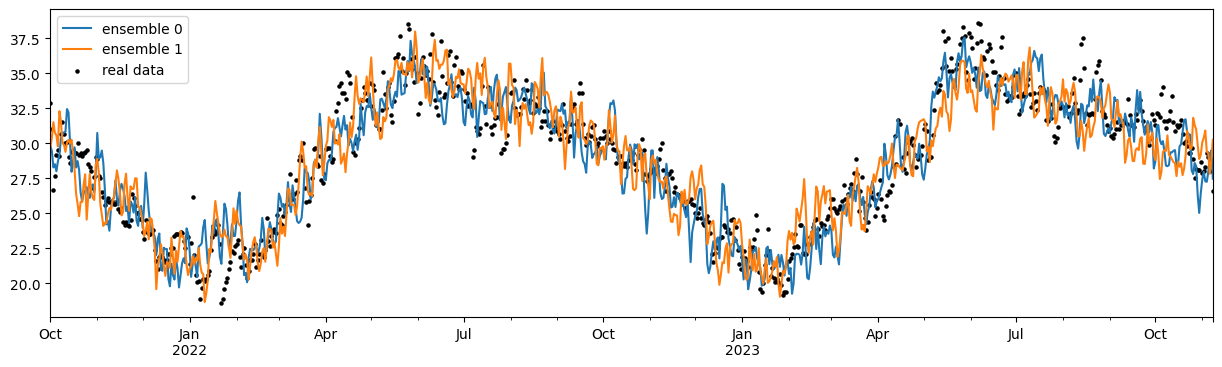

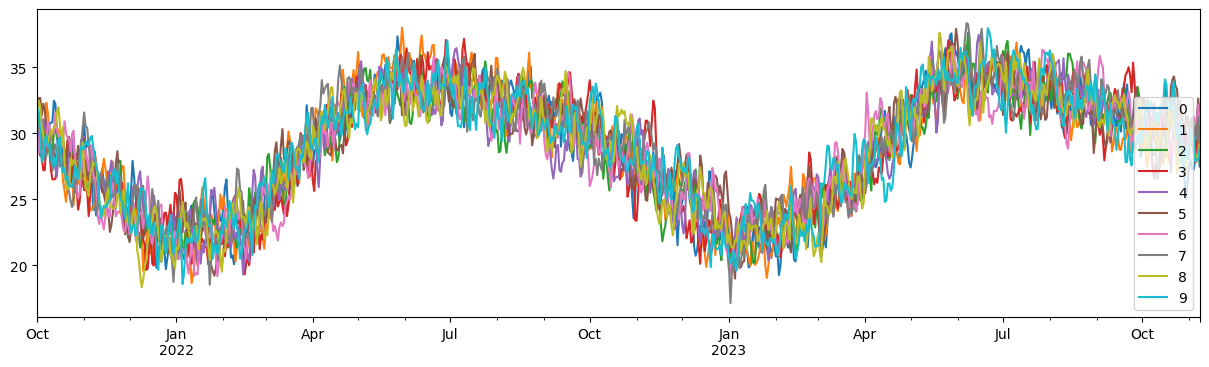

In [154]:
# add simulated residuals to trend and Seasonality
ensembles= sim["Residual"]
for i in sim["Residual"].columns:
  ensembles[i]=sim["Residual"][i]+decomposed_temp["Trend"]+decomposed_temp["Seasonal"]
ensembles[[0,1]].plot(figsize=(15, 4))
plt.scatter(t.index,t["tair"],s=5,color="black")
plt.legend(["ensemble 0", "ensemble 1", "real data"])
ensembles.plot(figsize=(15, 4))

In [ ]:
ensembles.to_csv("ensembles_tair.csv")